<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Nov 27 00:53:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:3B:00.0 Off |                    0 |
| N/A   28C    P0    25W / 250W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision.datasets import MNIST
from torchvision import transforms

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

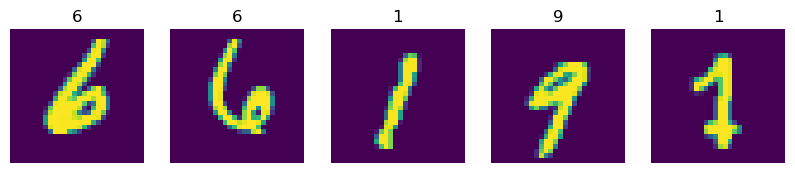

In [4]:
import matplotlib.pyplot as plt
import random

rand_idx_list = random.sample(range(len(train_data)), k=5)
plt.subplots(1,5,figsize=(10,2))
i=0
for rand_idx in rand_idx_list:
    i+=1
    img, label = train_data[rand_idx]
    # print(img.shape)
    plt.subplot(1,5,i)
    plt.imshow(img.permute(1,2,0))
    plt.title(label)
    plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = 1

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, in_shape, out_shape, hidden_units):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=out_shape)
        )
    def forward(self, x:torch.Tensor):
        return self.classifier(self.block_2(self.block_1(x)))
        
model = TinyVGG(in_shape=1, out_shape=len(train_data.classes), hidden_units=10).to(device)
model

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

epochs = 5

for epoch in range(epochs):
    
    # switch to training mode
    model.train()
    
    # initialize train loss and acc
    train_loss, train_acc = 0, 0
    
    # loop over dataloader
    for batch, (X, y) in enumerate(train_dataloader):
        # send data to device
        X, y = X.to(device), y.to(device)
        # forward pass
        y_logit = model(X)
        # training loss
        loss = loss_fn(y_logit, y)
        # train prediction
        y_preds = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
        # train loss and accuracy        
        train_loss += loss.item()
        train_acc += torch.sum(y_preds == y) / len(y_preds)
        # zero out gradient
        optimizer.zero_grad()
        # back propagation
        loss.backward()
        # optimizer steps
        optimizer.step()
        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # switch to test mode
    model.eval()
    # initialize test loss and accuracy
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            # send test data to device
            X, y = X.to(device), y.to(device)
            # forward pass
            y_logit = model(X)
            # test prediction
            y_preds = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
            # test loss and acc
            test_loss += loss_fn(y_logit, y).item()
            test_acc += torch.sum(y_preds == y) / len(y_preds)
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"train_loss: {train_loss:.3f} | train_acc: {train_acc:.3f} | test_loss: {test_loss:.3f} | test_acc: {test_acc:.3f}")

train_loss: 0.239 | train_acc: 0.926 | test_loss: 0.076 | test_acc: 0.976
train_loss: 0.082 | train_acc: 0.976 | test_loss: 0.057 | test_acc: 0.982
train_loss: 0.063 | train_acc: 0.981 | test_loss: 0.045 | test_acc: 0.986
train_loss: 0.051 | train_acc: 0.984 | test_loss: 0.045 | test_acc: 0.986
train_loss: 0.043 | train_acc: 0.987 | test_loss: 0.046 | test_acc: 0.986


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

correct prediction: 31 | Incorrect prediction: 1


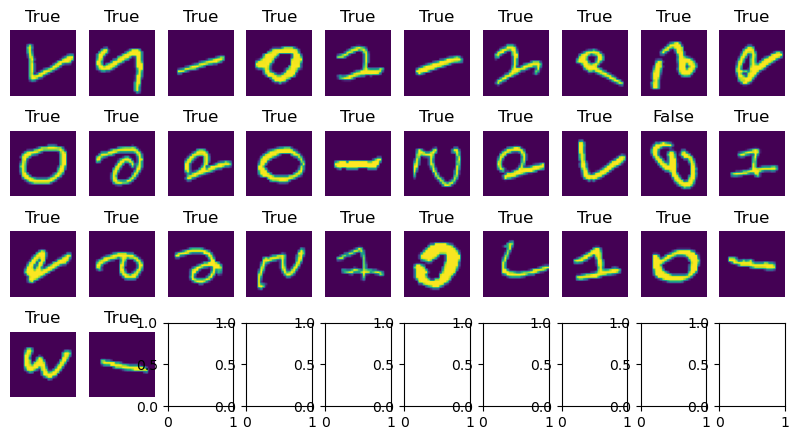

In [8]:
img_batch, label_batch = next(iter(test_dataloader))
img_batch = img_batch.to(device)
y_label = torch.argmax(torch.softmax(model(img_batch), dim=1), dim=1)

ncorrect = torch.sum(y_label.cpu() == label_batch) 
nincorrect = len(img_batch) - ncorrect
print(f"correct prediction: {ncorrect} | Incorrect prediction: {nincorrect}")

ncols = 10
nrows = int(len(img_batch) / ncols + 1)


fig, ax = plt.subplots(nrows, ncols, figsize=(10,5))
for i in range(len(img_batch)):
    img = img_batch[i].cpu()
    label = label_batch[i].item()
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(img.permute(2,1,0))
    plt.title(f"{label == y_label[i]}")
    plt.axis(False)



## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?